<a href="https://colab.research.google.com/github/Hamnanazrin/project-dsml/blob/main/project%20dsml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving BankMarketingCSV.csv to BankMarketingCSV.csv
Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  y           45211 non-null  object
dtypes: int64(8

,Unnamed: 0,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_ jul,month_ jun,month_ mar,month_ may,month_ nov,month_ oct,month_ sep,poutcome_ other,poutcome_ success,poutcome_ unknown
0,1,58,NaN,2143,NaN,NaN,5,261,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,2,44,NaN,29,NaN,NaN,5,151,1,-1,...,False,False,False,True,False,False,False,False,False,True
2,3,33,NaN,2,NaN,NaN,5,76,1,-1,...,False,False,False,True,False,False,False,False,False,True
3,4,47,NaN,1506,NaN,NaN,5,92,1,-1,...,False,False,False,True,False,False,False,False,False,True
4,5,33,NaN,1,NaN,NaN,5,198,1,-1,...,False,False,False,True,False,False,False,False,False,True



Data for countplot of 'y':
y
0    39922
1     5289
Name: count, dtype: int64


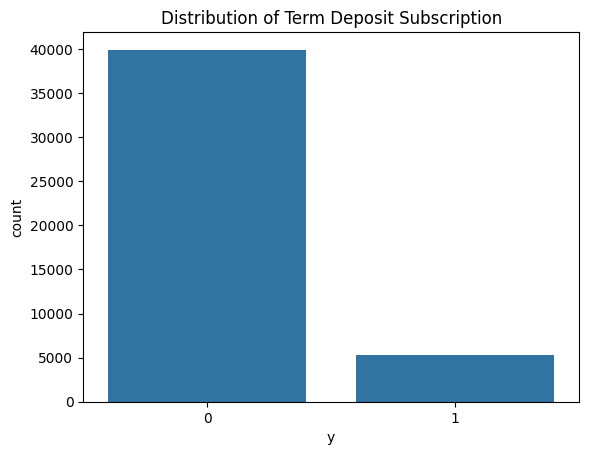


Data for boxplot of 'age' by 'y':
   y  age
0  0   58
1  0   44
2  0   33
3  0   47
4  0   33


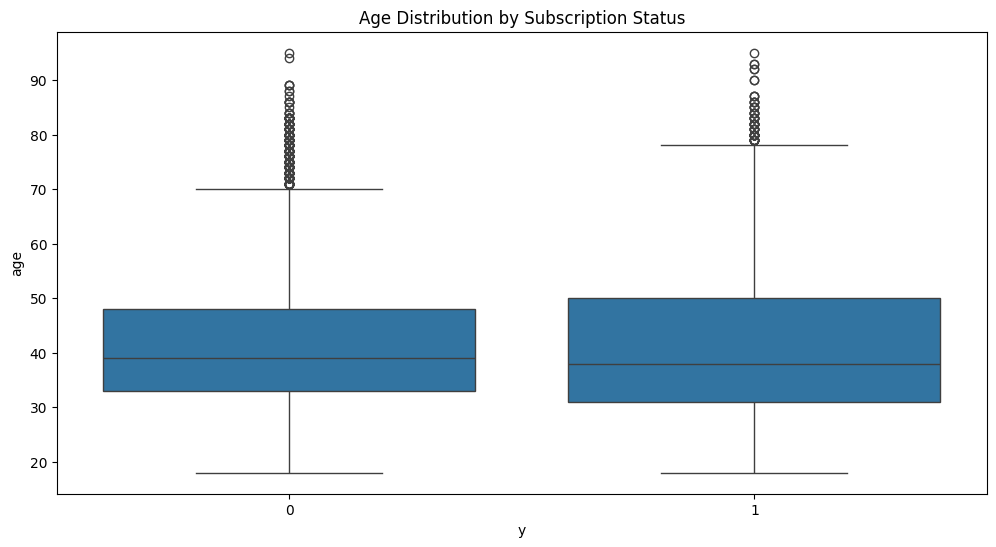


Data for job subscription rates:
{' blue-collar': np.float64(0.07274969173859433), ' entrepreneur': np.float64(0.08271687962340282), ' housemaid': np.float64(0.08790322580645162), ' management': np.float64(0.13755550856417847), ' retired': np.float64(0.22791519434628976), ' self-employed': np.float64(0.11842938568714376), ' services': np.float64(0.08883004333172845), ' student': np.float64(0.2867803837953092), ' technician': np.float64(0.11056996182703699), ' unemployed': np.float64(0.15502686108979277), ' unknown': np.float64(0.11805555555555555)}


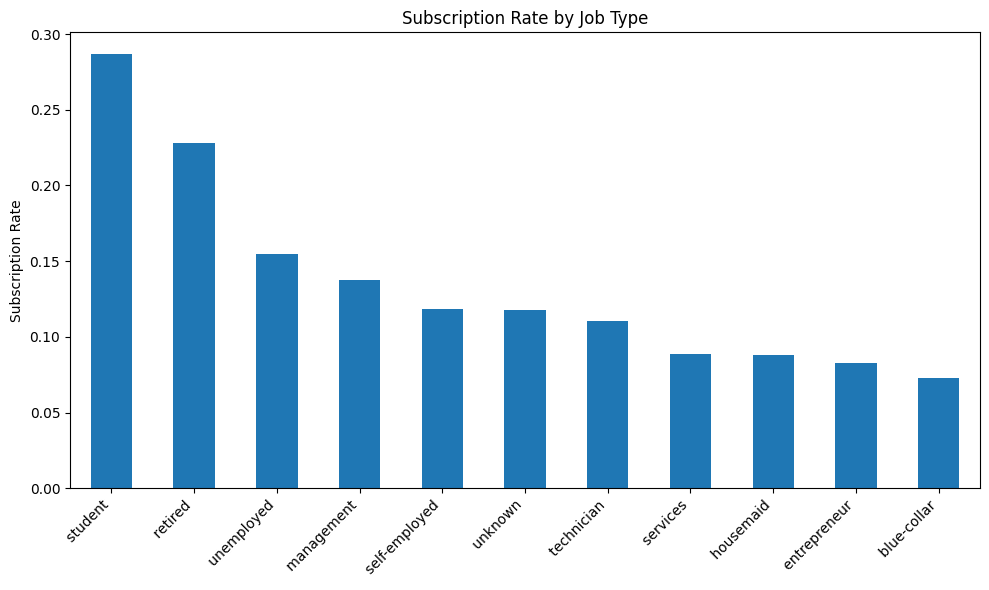


Calculating Correlation Matrix:


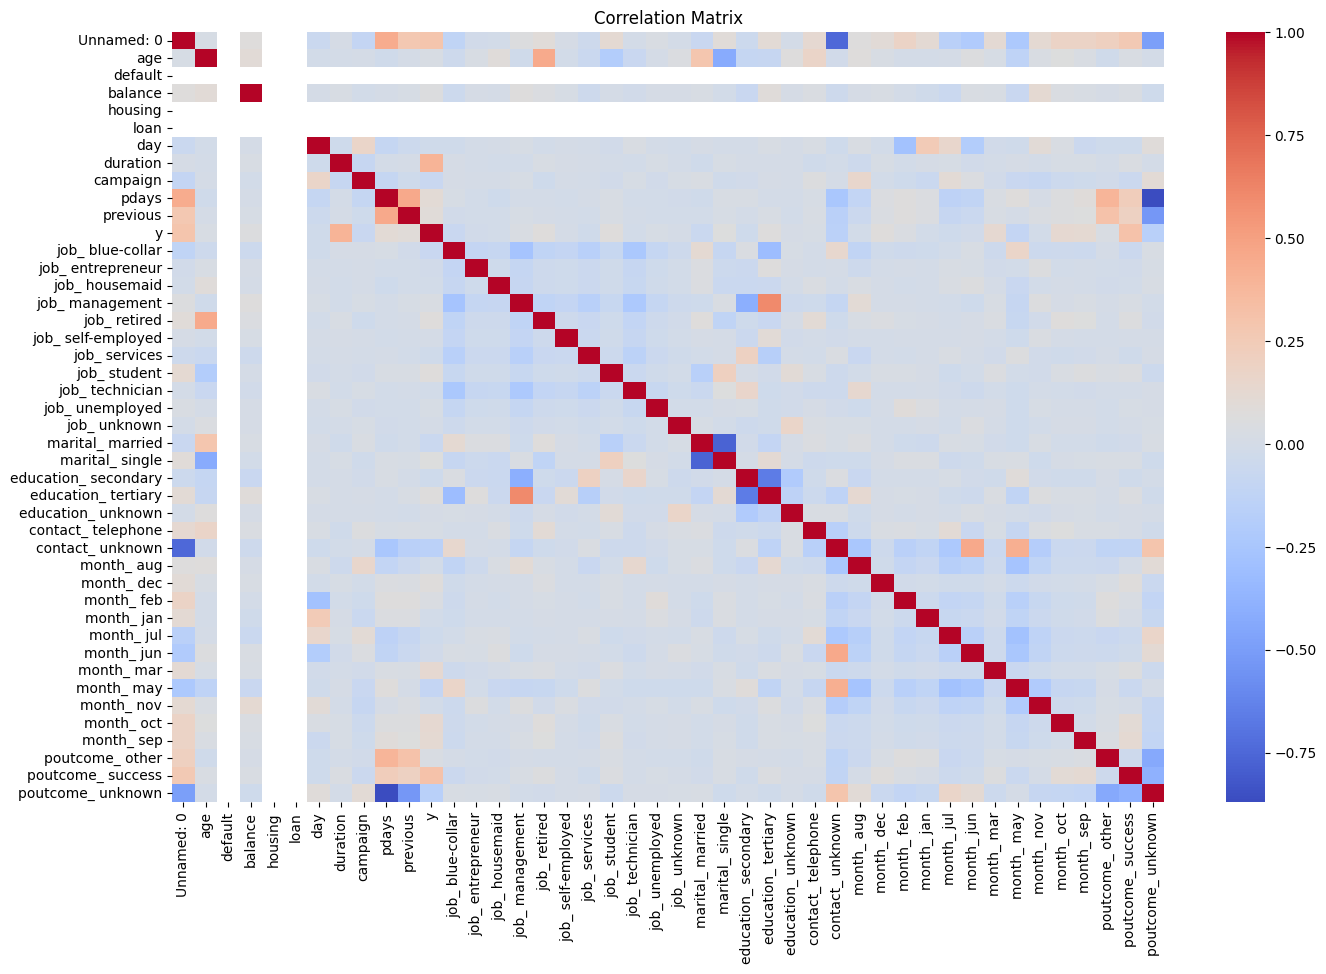

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

# Load the data
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Initial exploration
print("Initial DataFrame Info:")
print(df.info())
print("\nInitial DataFrame Head:")
print(df.head())

# Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())

# Clean and convert target variable to binary (1 for 'yes', 0 for 'no')
df['y'] = df['y'].str.strip().map({'yes': 1, 'no': 0})
print("\nValue counts for 'y' after mapping:")
print(df['y'].value_counts())

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Convert 'default', 'housing', and 'loan' to numerical
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

print("\nDataFrame Info after preprocessing:")
print(df.info())
print("\nDataFrame Head after preprocessing:")
display(df.head())

# Data Visualization

# Target variable distribution
print("\nData for countplot of 'y':")
print(df['y'].value_counts())
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscription')
plt.show()

# Age distribution by subscription
print("\nData for boxplot of 'age' by 'y':")
print(df[['y', 'age']].head())
plt.figure(figsize=(12,6))
sns.boxplot(x=df['y'].astype(str), y='age', data=df) # Convert 'y' to string
plt.title('Age Distribution by Subscription Status')
plt.show()

# Job type vs subscription
# Find all columns related to job after one-hot encoding and convert to int
job_columns = [col for col in df.columns if col.startswith('job_')]
# Ensure job columns are integer type for calculation
for col in job_columns:
    df[col] = df[col].astype(int)

job_subscription_rates = {}
for job_col in job_columns:
    job_name = job_col.replace('job_', '')
    # Calculate the mean subscription rate, handling cases with no subscriptions
    job_subscription_rates[job_name] = df[df[job_col] == 1]['y'].mean() if not df[df[job_col] == 1]['y'].empty else 0

print("\nData for job subscription rates:")
print(job_subscription_rates)
job_plot = pd.Series(job_subscription_rates).sort_values(ascending=False)
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
job_plot.plot(kind='bar')
plt.title('Subscription Rate by Job Type')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation matrix (for numerical variables)
print("\nCalculating Correlation Matrix:")
corr = df.corr()
plt.figure(figsize=(16,10)) # Increase figure size for better readability
sns.heatmap(corr, annot=False, cmap='coolwarm') # Set annot to False for potentially large matrices
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100],
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Balance categories
df['balance_category'] = pd.cut(df['balance'], bins=[-float('inf'), 0, 1000, 5000, float('inf')],
                                labels=['negative', 'low', 'medium', 'high'])

# Campaign intensity
df['campaign_intensity'] = pd.cut(df['campaign'], bins=[0, 1, 3, 5, 10, float('inf')],
                                 labels=['single', 'low', 'medium', 'high', 'very high'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify the new categorical columns
new_categorical_cols = ['age_group', 'balance_category', 'campaign_intensity']

# One-hot encode the new categorical columns
X = pd.get_dummies(X, columns=new_categorical_cols, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fill any remaining NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


# Scale numerical features
scaler = StandardScaler()
# Ensure only numerical columns are selected for scaling, excluding the Unnamed: 0 column
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
if 'Unnamed: 0' in num_cols:
    num_cols.remove('Unnamed: 0')

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.39      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564

ROC AUC Score: 0.9224


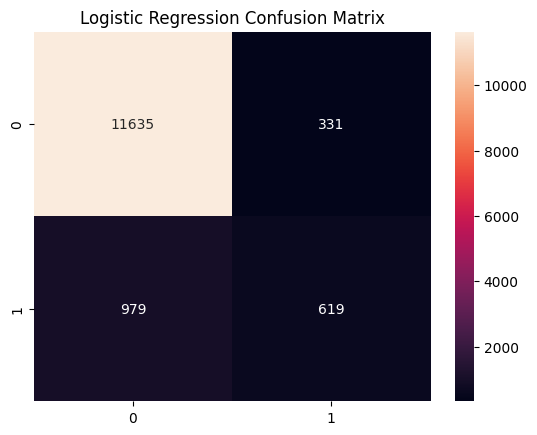


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.69      0.46      0.55      1598

    accuracy                           0.91     13564
   macro avg       0.81      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564

ROC AUC Score: 0.9390


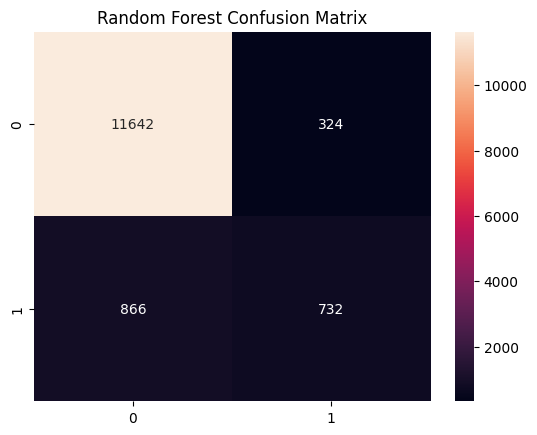


SVM Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.00      0.00      0.00      1598

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

ROC AUC Score: 0.3815


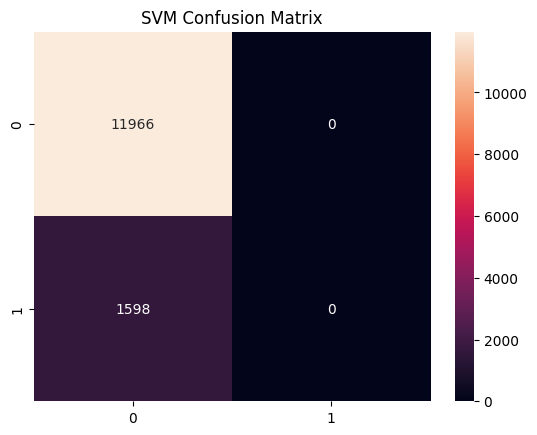


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11966
           1       0.66      0.56      0.60      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.76      0.78     13564
weighted avg       0.91      0.91      0.91     13564

ROC AUC Score: 0.9431


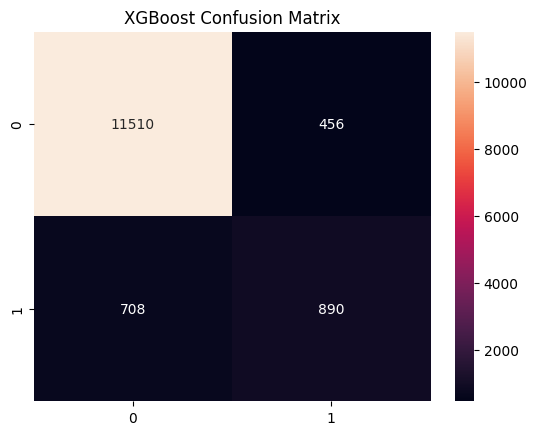

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()